In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
#df['agea']=np.sqrt(df.agea)

In [3]:

df['senior'] = pd.get_dummies(df['agea'] > 65, drop_first=True)
df['joyful'] = pd.get_dummies(df['happy'] >= 8, drop_first=True)
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'joyful'])]
#X['agelessthan30'] = pd.Series(np.where(X.agea < 30, 1, 0))
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
#X = pd.concat([X, pd.get_dummies(np.sqrt(df.agea), drop_first=True, prefix='agelessthan30')], axis=1)
print(X.head())
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]
# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

   year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  gndr  agea  \
0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   2.0  60.0   
1     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   2.0  59.0   
2     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   1.0  24.0   
3     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   2.0  64.0   
4     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   2.0  55.0   

   senior  CH  CZ  DE  ES  NO  SE  
0       0   1   0   0   0   0   0  
1       0   1   0   0   0   0   0  
2       0   1   0   0   0   0   0  
3       0   1   0   0   0   0   0  
4       0   1   0   0   0   0   0  


In [4]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'max_depth': 5,
          'loss': 'exponential', 'learning_rate': 0.001,}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.018139661756683034
Percent Type II errors: 0.21644844517184944

Test set accuracy:
Percent Type I errors: 0.03190184049079755
Percent Type II errors: 0.2331288343558282


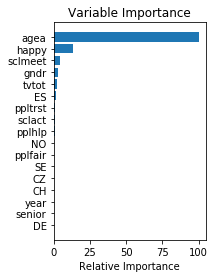

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

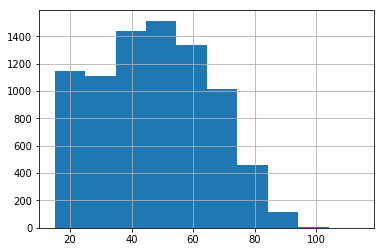

In [6]:
df.agea.hist()

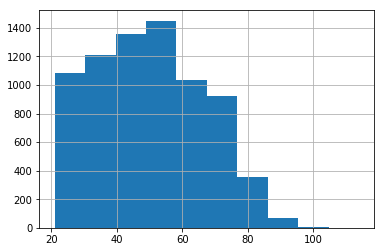

In [7]:
df.agea[df.agea>20].hist()

In [8]:
import seaborn as sns
sns.pairplot(np.sqrt(df.age.hist))

AttributeError: 'DataFrame' object has no attribute 'age'

In [ ]:
np.sqrt(df.agea).hist()